# <font color='Red'>MODEL 1</font>

## <font color = 'Orange'>Convolutional Neural Network Architecture</font>

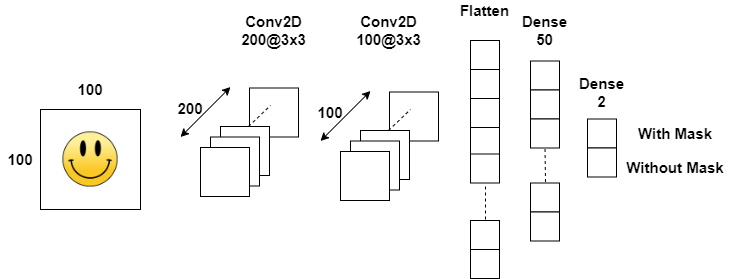

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
import numpy as np
import tensorflow.keras
import tensorflow.keras.backend as k
from tensorflow.keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import cv2
import datetime

In [7]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(358, 100, 100, 1)
(358, 2)
(40, 100, 100, 1)
(40, 2)


In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=25,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/25
9/9 [==============================] - 16s 2s/step - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.4413 - val_accuracy: 0.8611
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/25
9/9 [==============================] - 19s 2s/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.4001 - val_accuracy: 0.8194
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/25
9/9 [==============================] - 16s 2s/step - loss: 0.0170 - accuracy: 0.9965 - val_loss: 0.3889 - val_accuracy: 0.8611
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/25
9/9 [==============================] - 15s 2s/step - loss: 0.0151 - accuracy: 0.9965 - val_loss: 0.4058 - val_accuracy: 0.8472
Epoch 5/25
9/9 [==============================] - 15s 2s/step - loss: 0.0147 - accuracy: 0.9965 - val_loss: 0.5525 - val_accuracy: 0.7917
Epoch 6/25
9/9 [==============================] - 15s 2s/step - loss: 0.0299 - accuracy: 0.9930 - val_loss: 0.5208 - val_accuracy: 0.861

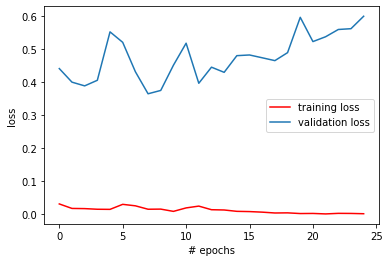

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

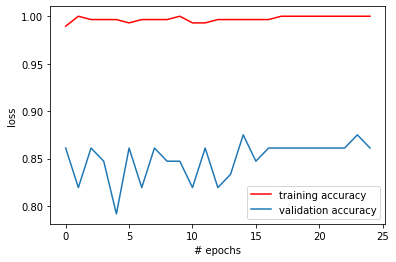

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

2/2 [==============================] - 1s 131ms/step - loss: 2.0247 - accuracy: 0.7500
[2.024667739868164, 0.75]


### Since the model is overfitting we need to apply regularization techniques.

# <font color = 'orange'>MODEL 2</font>

### <font color = 'orange'>DATA AUGMENTATION</font>

In [2]:
# 1. Building the convolution neural network architecture whcih accepti/p input image in shape of 150*150*3 in 3D dimension only.
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [3]:
# 2. next we are compling the model with loss as bianry_crossentropy and metric as accuracy
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
# 3. creating image Imagedatagenerator object with the help of which we will load the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all the images with maximum pixel as our cnn accept in that format only
        shear_range=0.2, # doing the data augumentation for better working of model.
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
#augmentation
train= 'C:/Users/RANJAN_KESHRI/Desktop/MTECH/DL/Projects/Covid19-Face-Mask-detection-main/data/'
test = 'C:/Users/RANJAN_KESHRI/Desktop/MTECH/DL/Projects/Covid19-Face-Mask-detection-main/test/'

In [6]:
# 4. loading the data stored in the folder with the imgae data generator object that we just created above.
training_set = train_datagen.flow_from_directory(
        train,
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

testing_set = test_datagen.flow_from_directory(
        test,
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 1575 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [7]:
# 5. defining the call backs 
# 5.1 Earlystopping- it is used for early stopping the ephoc if monitor= val_loss in not decresing for 3 consecutive ephoc.
# 5.2 ModelCheckpoint- it is used to saved that ephoc weight only which has best val loss.
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

keras_callbacks=[EarlyStopping(monitor='val_loss',patience=3,mode='min',min_delta=0.0001),
                ModelCheckpoint('./Checkpoints',monitor='val_loss',save_best_only=True,mode='min')]

In [8]:
# fitting the created cnn with the loaded data.
model_saved=model.fit(training_set,
                        epochs=30,
                        validation_data=testing_set,
                        callbacks=keras_callbacks)

Epoch 1/30
99/99 [==============================] - 58s 574ms/step - loss: 0.4049 - accuracy: 0.8025 - val_loss: 0.2579 - val_accuracy: 0.9330
INFO:tensorflow:Assets written to: .\Checkpoints\assets
Epoch 2/30
99/99 [==============================] - 55s 553ms/step - loss: 0.2065 - accuracy: 0.9251 - val_loss: 0.1801 - val_accuracy: 0.9433
INFO:tensorflow:Assets written to: .\Checkpoints\assets
Epoch 3/30
99/99 [==============================] - 58s 584ms/step - loss: 0.1644 - accuracy: 0.9397 - val_loss: 0.1108 - val_accuracy: 0.9485
INFO:tensorflow:Assets written to: .\Checkpoints\assets
Epoch 4/30
99/99 [==============================] - 55s 552ms/step - loss: 0.1606 - accuracy: 0.9403 - val_loss: 0.1547 - val_accuracy: 0.9278
Epoch 5/30
99/99 [==============================] - 54s 547ms/step - loss: 0.1278 - accuracy: 0.9511 - val_loss: 0.0852 - val_accuracy: 0.9536
INFO:tensorflow:Assets written to: .\Checkpoints\assets
Epoch 6/30
99/99 [==============================] - 55s 549ms

In [9]:
# model_saved.evaluate(testing_set)
test_loss , test_acc =model.evaluate(testing_set)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

13/13 [==============================] - 2s 137ms/step - loss: 0.1447 - accuracy: 0.9536
test loss:0.14472641050815582 test acc:0.9536082744598389


### <font color='orange'>Saved Model</font>

In [10]:
# saving the model weight because it is a best mdoel.
model.save('mymodel.h5',model_saved)

Text(0, 0.5, 'loss')

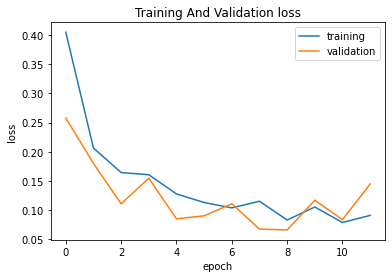

In [11]:
plt.plot(model_saved.history['loss'])
plt.plot(model_saved.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training And Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

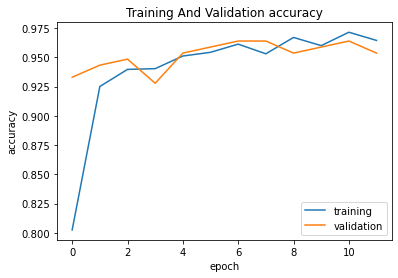

In [12]:
plt.plot(model_saved.history['accuracy'])
plt.plot(model_saved.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training And Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [ ]:
# from above 2 graphs we can infer that our gap between training and validation is less means on each ephoc there is almost
# no overfitting.

### <font color = 'orange'>Prediction</font>

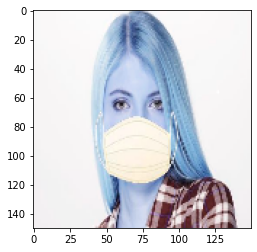

In [13]:
# doing the prediction on test image using model.predict function.
import cv2
sample_mask_img = cv2.imread('C:/Users/RANJAN_KESHRI/Desktop/MTECH/DL/Projects/Covid19-Face-Mask-detection-main/val/with_mask/20-with-mask.jpg')
sample_mask_img = cv2.resize(sample_mask_img,(150,150))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,150,150,3])
sample_mask_img = sample_mask_img/255.0

In [14]:
result=model.predict(sample_mask_img)

In [15]:
if result == 1:
    prediction = 'Without Mask'
else:
    prediction = 'With Mask'

print(prediction)

With Mask


In [ ]:
# so our model is predicting correctly a amsk person with label as with mask.

# <font color = 'orange'>MODEL 3</font> 
## <font color = 'orange'>Transfer Learning</font> 

In [135]:
#augmentation
train_dir = '/Users/mons/Downloads/DL-PROJECT TEAM 8/dataset/Train'
test_dir = '/Users/mons/Downloads/DL-PROJECT TEAM 8/dataset/Test'
val_dir = '/Users/mons/Downloads/DL-PROJECT TEAM 8/dataset/Validation'

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 398 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [136]:
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(128,128,3))
for layer in mobilenet.layers:
    layer.trainable = False
model1 = Sequential()
model1.add(mobilenet)
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_5 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 20480)             0         
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 20481     
Total params: 2,278,465
Trainable params: 20,481
Non-trainable params: 2,257,984
_________________________________________________________________


In [137]:
for layers in model.layers:
    if('dense' not in layers.name):
        layers.trainable = False
    if('dense' in layers.name):
        print(layers.name + ' is trained')

dense_70 is trained


In [138]:
model1.compile(optimizer=Adam(learning_rate = 0.00001),loss="binary_crossentropy",metrics ="accuracy")


In [139]:
history = model1.fit(train_generator,epochs=20,validation_data=valid_generator)

Epoch 1/20
13/13 [==============================] - 23s 2s/step - loss: 1.1592 - accuracy: 0.5000 - val_loss: 0.8322 - val_accuracy: 0.5359
Epoch 2/20
13/13 [==============================] - 17s 1s/step - loss: 1.1495 - accuracy: 0.5000 - val_loss: 0.8151 - val_accuracy: 0.5359
Epoch 3/20
13/13 [==============================] - 25s 2s/step - loss: 1.1508 - accuracy: 0.5000 - val_loss: 0.8276 - val_accuracy: 0.5131
Epoch 4/20
13/13 [==============================] - 28s 2s/step - loss: 1.1097 - accuracy: 0.5000 - val_loss: 0.8392 - val_accuracy: 0.5098
Epoch 5/20
13/13 [==============================] - 21s 2s/step - loss: 1.1273 - accuracy: 0.5000 - val_loss: 0.8467 - val_accuracy: 0.5033
Epoch 6/20
13/13 [==============================] - 29s 2s/step - loss: 1.1301 - accuracy: 0.5000 - val_loss: 0.8537 - val_accuracy: 0.5033
Epoch 7/20
13/13 [==============================] - 23s 2s/step - loss: 1.1629 - accuracy: 0.5000 - val_loss: 0.8485 - val_accuracy: 0.4967
Epoch 8/20
13/13 [==

In [140]:
model1.evaluate_generator(test_generator)

[0.8477053046226501, 0.5]

# <font color = 'orange'>Detecting faces with and without mask</font> 

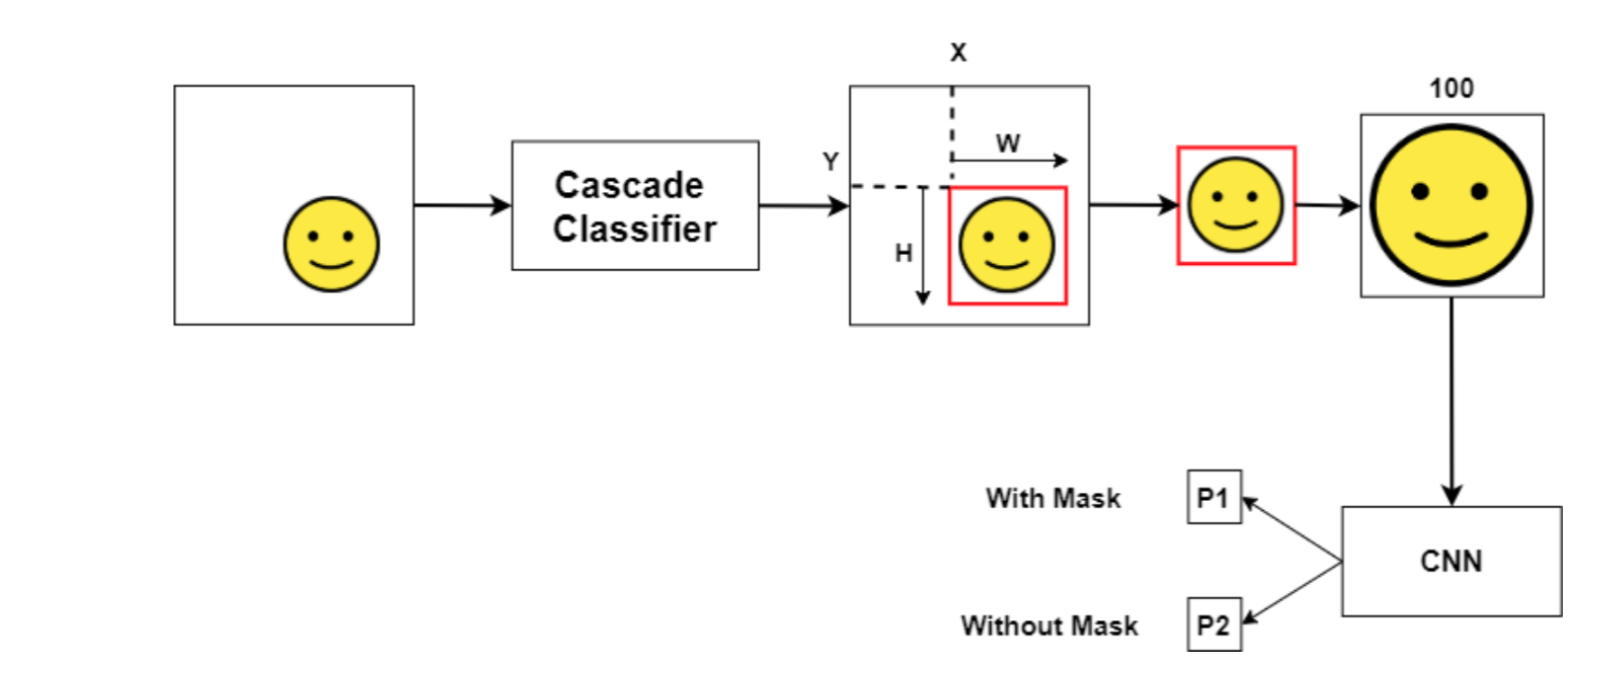

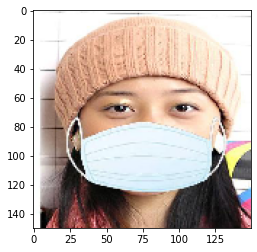

In [16]:
mymodel=load_model('mymodel.h5')

test_image=image.load_img('C:/Users/RANJAN_KESHRI/Desktop/MTECH/DL/Projects/Covid19-Face-Mask-detection-main/val/with_mask/44-with-mask.jpg',target_size=(150,150,3))
test_image
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=mymodel.predict(test_image)[0][0]

In [17]:
if result == 1:
    prediction = 'Without Mask'
else:
    prediction = 'With Mask'

print(prediction)

With Mask


In [18]:
display = 1 # if display>0 then we can show the frame by frame output of each frame.
output = "output_video_model_facemask3.avi" # declaring the file name with which we can save our o/p video.

In [19]:
writer = None

In [ ]:
mymodel=load_model('mymodel.h5') # laode again the same model weight.

cap=cv2.VideoCapture("Capture_20210630_1.mp4") # using cv2.video capture we can take i/p video from video file,CCTV ca,era as well.
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened(): # in this while loop we are using a face cascade object detection in built model that capture the face region.
                      # and on each face region per frame we are gioing to apply our model that will predict face or not.
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=mymodel.predict(test_image)[0][0]
        if pred==1: # if prediction =1 then label is no mask so danger case and put a bounding box with red color.
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK(Entry Restricted)',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
           
        else: # els eput a bounding box with green color which mean safe.
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
    if display > 0:
        # show the output frame
        cv2.imshow("Frame", img)
            
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
   
    if output != "" and writer is None:
        # initialize our video writer
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter(output, fourcc, 25, (img.shape[1], img.shape[0]), True)

    if writer is not None:
        writer.write(img)
    
cap.release()
cv2.destroyAllWindows()

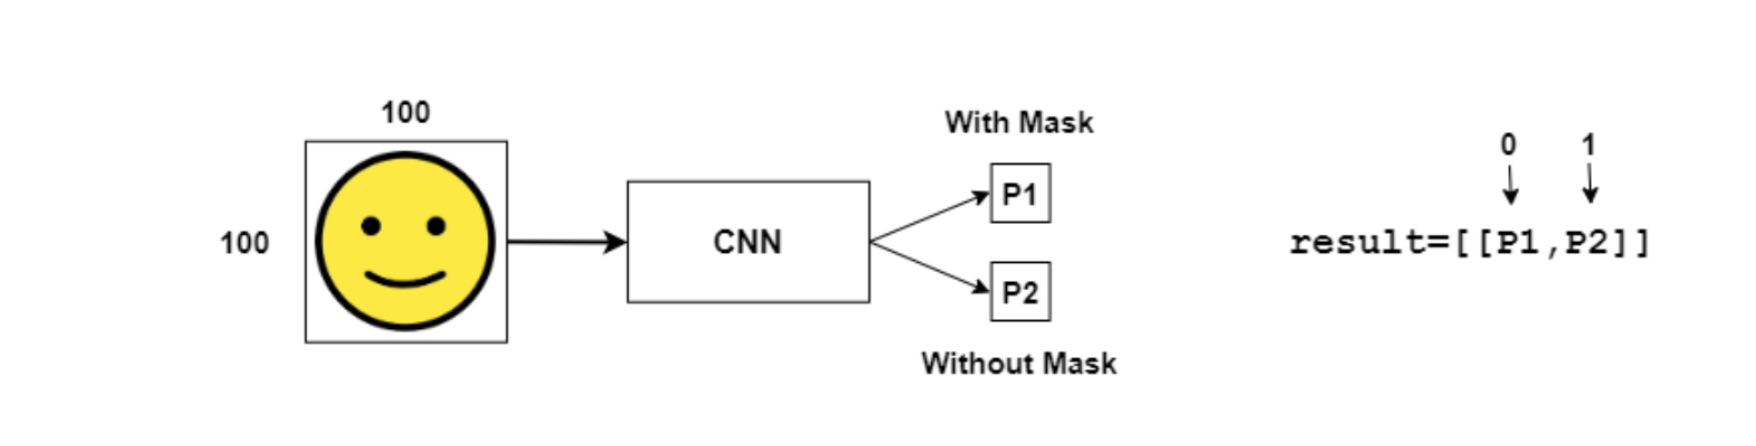

# <center><font color = 'Red'>The End</font></center>